In [2]:
import numpy as np
import cv2 as cv
import pandas as pd
import os
from glob import glob
from matplotlib import pyplot as plt
import sys

sys.path.append('../../..')

from utpnerves.preprocessing import Proceso
from utpnerves.preprocessing import Unet

def viz(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')

In [2]:
list_imgs = glob('.\\assets\\imgs\\*.jpg')
list_imgs

['.\\assets\\imgs\\CPD09042021001_t_26_4.jpg',
 '.\\assets\\imgs\\CPD09042021001_t_41_9.jpg',
 '.\\assets\\imgs\\CPD09042021001__20aguja_t_21_4.jpg',
 '.\\assets\\imgs\\CPD09042021002_t_23_9.jpg',
 '.\\assets\\imgs\\CPD09042021002_t_51_85.jpg']

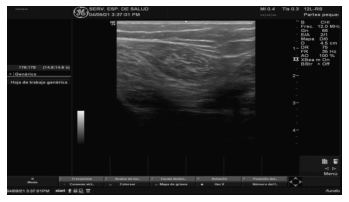

In [3]:
img_path = np.random.choice(list_imgs)
img_array = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
viz(img_array)

In [4]:
p = Proceso()
u = Unet()

modelo = u.unet()
# Cargar los pesos pre-entrenados del modelo
modelo.load_weights(os.path.join('assets', 'models', 'pesosBalanceBlancos.h5'))
# Procesar la imagen-array
img_process = p.imagen_proceso(img_array)
# Pasar la imagen procesada a la etapa de inferencia
prediccion = modelo.predict(img_process)
# Limitar la predicción
aux = prediccion < 1.0
prediccion[aux] = 0
# Pasar de un tensor-imagen a una imagen que se pueda mostrar
prediccion = prediccion[0, :, :, 0]
# Eliminar areas pequeñas de la imagen
img_areas_remove = p.remover_areas(prediccion)
# Redondear los valores del preproces anterior
img_round = np.round(p.aumento_tam(img_areas_remove, img_array.shape))
# Calcular el rectángulo que encierra la predicción
mask_rectangle = p.cuadrar_rect(img_round)
# cinfigurar el rectangulo como una imagen
final_image = p.dim_rec(mask_rectangle, img_array)  # nos interesa esta
# Multiplicar el rectángulo con la imagen original



1/1 [==============================] - 1s 1s/step


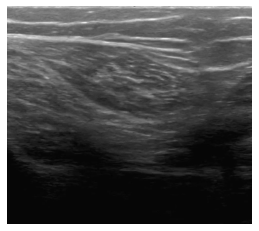

In [5]:
viz(final_image)